# Network analysis & GIS

We will introduce two modules in Python: networkx and geopandas. Networkx is used for classical network analysis, while GeoPandas is the extension of Pandas into spatial analysis. As you will see GeoPandas could achieve most of the things the ArcGIS could do. The strength of Geopandas is its computational efficiency, while its weakness is its lack of interactive interface as in ArcGIS. However, the interactive interface in ArcGIS consumes a lot of computational resource, which renders GeoPandas an efficient spatial processing tool in Python.

*   Section 0. Reading files
*   Section 1. Visualizing nodes and edges (GIS)




## Section 0. Reading the files

In [6]:
# import modules (old)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [7]:
# import modules (new)
import geopandas as gpd
import networkx as nx
from pysal.lib import weights
from pysal.lib import cg as geometry

In [8]:
# define the mounting point on Google drive
#from google.colab import drive
#drive.mount('/content/drive/')

In [9]:
# Switch to Colab Notebooks.
# Mac system
# !cd '/content/drive/My Drive/Colab Notebooks/data/'
# Windows system
%cd /content/drive/My Drive/Colab Notebooks/data/

[WinError 3] 系统找不到指定的路径。: '/content/drive/My Drive/Colab Notebooks/data/'
c:\Users\10090\Desktop\2023 UFlorida Summer Camp\script examples


In [10]:
# read the data and shapefile
df = pd.read_csv('Florida_ct.csv', index_col = 0)
florida_shapefile = gpd.read_file('tl_2020_12_tract/tl_2020_12_tract.shp') # read the shapefile

In [11]:
# view the dataframe
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,race_asian,inc_total_pop,inc_no_pop,inc_with_pop,inc_pop_10k,inc_pop_1k_15k,inc_pop_15k_25k,inc_pop_25k_35k,inc_pop_35k_50k,inc_pop_50k_65k,inc_pop_65k_75k,inc_pop_75k,inc_median_ind,travel_total_to_work,travel_driving_to_work,travel_pt_to_work,travel_taxi_to_work,travel_cycle_to_work,travel_walk_to_work,travel_work_from_home,edu_total_pop,bachelor_male_25_34,master_phd_male_25_34,bachelor_male_35_44,master_phd_male_35_44,bachelor_male_45_64,master_phd_male_45_64,bachelor_male_65_over,master_phd_male_65_over,bachelor_female_25_34,master_phd_female_25_34,bachelor_female_35_44,master_phd_female_35_44,bachelor_female_45_64,master_phd_female_45_64,bachelor_female_65_over,master_phd_female_65_over,edu_total,edu_bachelor,edu_master,edu_phd,inc_median_household,inc_per_capita,employment_total_labor,employment_employed,employment_unemployed,housing_units_total,housing_units_occupied,housing_units_vacant,rent_median,property_value_total,property_value_median,vehicle_total_imputed,state,state_fips,county_fips,tract_fips,full_ct_fips,household_size_avg,sex_male_ratio,race_white_ratio,race_black_ratio,race_native_ratio,race_asian_ratio,travel_driving_ratio,travel_pt_ratio,travel_taxi_ratio,travel_cycle_ratio,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,122.0,2423.0,568.0,1855.0,249.0,212.0,355.0,334.0,264.0,236.0,34.0,171.0,27304.0,1485.0,1326.0,64.0,28.0,0.0,22.0,36.0,2277.0,105.0,6.0,11.0,16.0,76.0,16.0,30.0,0.0,25.0,20.0,39.0,0.0,52.0,37.0,26.0,5.0,1980.0,364.0,59.0,6.0,53533.0,23778.0,2327.0,1660.0,667.0,1103.0,931.0,172.0,1592.0,562.0,240400.0,1485.0,FL,12,86,211,12086000211,3.020408,0.491821,0.741821,0.183855,0.000000,0.043385,0.892929,0.043098,0.018855,0.000000,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,88.0,3783.0,933.0,2850.0,316.0,413.0,851.0,587.0,412.0,94.0,8.0,169.0,22116.0,2167.0,1905.0,140.0,34.0,19.0,48.0,10.0,3672.0,58.0,32.0,109.0,41.0,35.0,37.0,21.0,22.0,99.0,7.0,37.0,25.0,49.0,32.0,12.0,26.0,3106.0,420.0,125.0,10.0,33958.0,21815.0,3754.0,2559.0,1195.0,1969.0,1668.0,301.0,1109.0,295.0,179900.0,2167.0,FL,12,86,212,12086000212,2.823141,0.482480,0.505840,0.414738,0.000000,0.018688,0.879096,0.064605,0.015690,0.008768,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,159.0,3816.0,892.0,2924.0,416.0,369.0,787.0,477.0,463.0,200.0,35.0,177.0,23410.0,2257.0,1847.0,150.0,116.0,0.0,59.0,63.0,3548.0,76.0,8.0,31.0,19.0,70.0,63.0,76.0,16.0,101.0,28.0,58.0,13.0,234.0,88.0,14.0,32.0,3095.0,660.0,200.0,23.0,40250.0,18184.0,3760.0,2381.0,1379.0,1646.0,1379.0,267.0,1291.0,685.0,254900.0,2257.0,FL,12,86,213,12086000213,3.629442,0.488312,0.466334,0.440759,0.044755,0.031768,0.818343,0.066460,0.051396,0.000000,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,354.0,4985.0,1121.0,3864.0,787.0,347.0,661.0,641.0,717.0,341.0,84.0,286.0,26392.0,3207.0,2646.0,278.0,45.0,23.0,169.0,13.0,4502.0,73.0,18.0,14.0,70.0,68.0,62.0,0.0,63.0,84.0,72.0,0.0,14.0,93.0,70.0,46.0,65.0,4048.0,378.0,334.0,51.0,39962.0,24937.0,4802.0,3292.0,1510.0,2725.0,2238.0,487.0,1135.0,1029.0,147800.0,3207.0,FL,12,86,214,12086000214,3.017873,0.434409,0.599941,0.247409,0.048268,0.052413,0.825070,0.086685,0.014032,0.007172,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,0.0,2691.0,318.0,2373.0,119.0,199.0,313.0,556.0,343.0,358.0,56.

In [12]:
# view the shapefile
florida_shapefile.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,+26.0230637,-080.4006685,"POLYGON ((-80.40957 26.03541, -80.40878 26.035..."
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,+26.2129463,-080.2358809,"POLYGON ((-80.24061 26.22083, -80.24056 26.220..."


In [13]:
# shape of the two files.
print(df.shape)
print(florida_shapefile.shape)

(4167, 88)
(5160, 13)


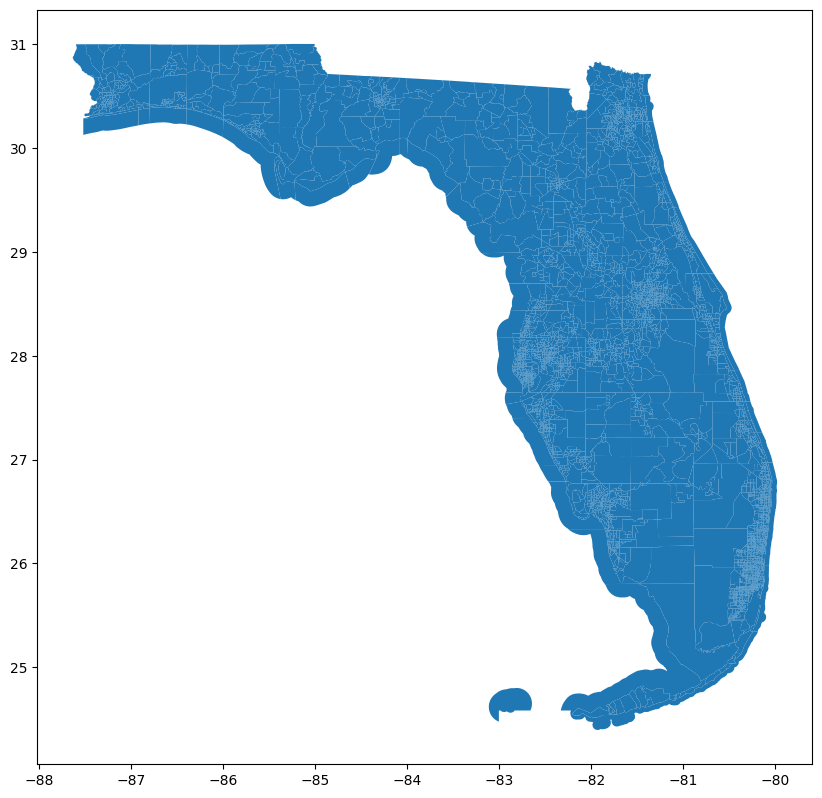

In [14]:
# quick view of the shapefile.
florida_shapefile.plot(figsize = (10,10))
plt.show()

## Preprocessing the data

In [15]:
# adjust the object types to facilitate the merge
florida_shapefile['GEOID'] = florida_shapefile.GEOID.astype('int64')

In [16]:
# combine the dataframe with the shapefile.
# Note that it is important to choose how - e.g., inner, right, left, etc. Here I choose 'left' for teaching purposes.
df_shp = florida_shapefile.merge(df,
                                 how = 'inner',
                                 left_on = 'GEOID',
                                 right_on = 'full_ct_fips')


In [17]:
# check the shape of the new file.
# It combines the census data set and the shapefile.
df_shp.shape
# 101 = 88 + 13

(3260, 101)

In [18]:
df_shp = df_shp[df_shp['property_value_median'] != 0]
df_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,race_asian,inc_total_pop,inc_no_pop,inc_with_pop,inc_pop_10k,inc_pop_1k_15k,inc_pop_15k_25k,inc_pop_25k_35k,inc_pop_35k_50k,inc_pop_50k_65k,inc_pop_65k_75k,inc_pop_75k,inc_median_ind,travel_total_to_work,travel_driving_to_work,travel_pt_to_work,travel_taxi_to_work,travel_cycle_to_work,travel_walk_to_work,travel_work_from_home,edu_total_pop,bachelor_male_25_34,master_phd_male_25_34,bachelor_male_35_44,master_phd_male_35_44,bachelor_male_45_64,master_phd_male_45_64,bachelor_male_65_over,master_phd_male_65_over,bachelor_female_25_34,master_phd_female_25_34,bachelor_female_35_44,master_phd_female_35_44,bachelor_female_45_64,master_phd_female_45_64,bachelor_female_65_over,master_phd_female_65_over,edu_total,edu_bachelor,edu_master,edu_phd,inc_median_household,inc_per_capita,employment_total_labor,employment_employed,employment_unemployed,housing_units_total,housing_units_occupied,housing_units_vacant,rent_median,property_value_total,property_value_median,vehicle_total_imputed,state,state_fips,county_fips,tract_fips,full_ct_fips,household_size_avg,sex_male_ratio,race_white_ratio,race_black_ratio,race_native_ratio,race_asian_ratio,travel_driving_ratio,travel_pt_ratio,travel_taxi_ratio,travel_cycle_ratio,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994...",5628.0,5628.0,2877.0,2751.0,37.8,1609.0,5628.0,1802.0,2984.0,0.0,393.0,4646.0,697.0,3949.0,670.0,301.0,856.0,646.0,614.0,460.0,170.0,232.0,26446.0,3117.0,2939.0,49.0,26.0,50.0,0.0,53.0,4463.0,20.0,49.0,29.0,11.0,112.0,19.0,3.0,43.0,98.0,52.0,24.0,80.0,32.0,11.0,44.0,30.0,3957.0,362.0,238.0,55.0,57014.0,24220.0,4646.0,3352.0,1294.0,1660.0,1609.0,51.0,1740.0,1401.0,222100.0,3117.0,FL,12,11,110403,12011110403,3.497825,0.511194,0.320185,0.530206,0.000000,0.069829,0.942894,0.01572,0.008341,0.016041,0.000000,0.017004,0.091483,0.060147,0.013899,0.165529,0.278519,0.553838,1.937228,0.030723
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193...",6335.0,6335.0,2661.0,3674.0,37.1,1965.0,6335.0,2426.0,3197.0,60.0,34.0,5285.0,471.0,4814.0,585.0,540.0,1013.0,710.0,723.0,389.0,173.0,681.0,27500.0,3846.0,3463.0,46.0,0.0,60.0,40.0,194.0,5110.0,61.0,0.0,125.0,59.0,86.0,69.0,63.0,0.0,361.0,57.0,141.0,26.0,306.0,146.0,12.0,11.0,4548.0,1155.0,249.0,106.0,78375.0,36338.0,5221.0,4002.0,1219.0,2205.0,1965.0,240.0,1571.0,1512.0,265900.0,3846.0,FL,12,11,60114,12011060114,3.223919,0.420047,0.382952,0.504657,0.009471,0.005367,0.900416,0.01196,0.000000,0.015601,0.010400,0.050442,0.253958,0.054749,0.023307,0.332014,0.233480,0.607103,1.957252,0.108844
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128...",7301.0,7301.0,3495.0,3806.0,36.4,2418.0,7301.0,5089.0,1485.0,0.0,370.0,6097.0,995.0,5102.0,900.0,322.0,467.0,636.0,577.0,502.0,217.0,1481.0,40592.0,4049.0,3385.0,76.0,0.0,22.0,64.0,378.0,5807.0,211.0,49.0,261.0,90.0,245.0,234.0,52.0,52.0,249.0,93.0,251.0,176.0,298.0,76.0,76.0,84.0,5073.0,1643.0,603.0,67.0,96053.0,41716.0,6013.0,4456.0,1557.0,3084.0,2418.0,666.0,1897.0,1497.0,351000.0,4049.0,FL,12,11,60120,12011060120,3.019438,0.478702,0.697028,0.203397,0.000000,0.050678,0.836009,0.01877,0.000000,0.005433,0.015806,0.093356,0.323871,0.118865,0.013207,0.455943,0.258939,0.554582,1.674524,0.215953
3,12,011,040902,12011040902,409.02,Census Tract 409.02,G5020,S,1362355,0,+26.1439478,-080.1581754,"POLYGON ((-80.16246 26.15137, -80.1620

In [19]:
df_shp['geometry']


0       POLYGON ((-80.24758 25.99480, -80.24754 25.994...
1       POLYGON ((-80.26810 26.19368, -80.26702 26.193...
2       POLYGON ((-80.36670 26.12828, -80.36649 26.128...
3       POLYGON ((-80.16246 26.15137, -80.16205 26.151...
4       POLYGON ((-80.29765 26.29416, -80.29764 26.294...
                              ...                        
3255    POLYGON ((-82.11510 26.99392, -82.11501 26.994...
3256    POLYGON ((-85.66319 30.14896, -85.65959 30.151...
3257    POLYGON ((-85.44868 30.02877, -85.44723 30.030...
3258    POLYGON ((-85.60781 30.17663, -85.60781 30.179...
3259    POLYGON ((-82.02084 26.94932, -82.02080 26.950...
Name: geometry, Length: 3260, dtype: geometry

In [20]:
import geopandas as gpd

# 假设 'geometry' 列包含地理几何对象
# 创建一个新列 'area_km2' 用于存储每个地区的面积（平方千米）
df_shp['area_km2'] = df_shp['geometry'].to_crs(epsg=3395).area / 10**6

# 打印 DataFrame，包括地区的大小（平方千米）
print(df_shp[['area_km2']])  # 包括 'area_km2' 列和其他需要的列



        area_km2
0       1.635404
1       3.223209
2      18.141079
3       1.688393
4      11.318647
...          ...
3255    3.428919
3256    8.403446
3257   84.217261
3258  489.230732
3259   61.814864

[3260 rows x 1 columns]


In [21]:
# With the current approach, I will fill in ZEROS into the NaN values.
# However, it is NOT necessarily the best approach.
df_shp = df_shp.head(5)
df_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,race_asian,inc_total_pop,inc_no_pop,inc_with_pop,inc_pop_10k,inc_pop_1k_15k,inc_pop_15k_25k,inc_pop_25k_35k,inc_pop_35k_50k,inc_pop_50k_65k,inc_pop_65k_75k,inc_pop_75k,inc_median_ind,travel_total_to_work,travel_driving_to_work,travel_pt_to_work,travel_taxi_to_work,travel_cycle_to_work,travel_walk_to_work,travel_work_from_home,edu_total_pop,bachelor_male_25_34,master_phd_male_25_34,bachelor_male_35_44,master_phd_male_35_44,bachelor_male_45_64,master_phd_male_45_64,bachelor_male_65_over,master_phd_male_65_over,bachelor_female_25_34,master_phd_female_25_34,bachelor_female_35_44,master_phd_female_35_44,bachelor_female_45_64,master_phd_female_45_64,bachelor_female_65_over,master_phd_female_65_over,edu_total,edu_bachelor,edu_master,edu_phd,inc_median_household,inc_per_capita,employment_total_labor,employment_employed,employment_unemployed,housing_units_total,housing_units_occupied,housing_units_vacant,rent_median,property_value_total,property_value_median,vehicle_total_imputed,state,state_fips,county_fips,tract_fips,full_ct_fips,household_size_avg,sex_male_ratio,race_white_ratio,race_black_ratio,race_native_ratio,race_asian_ratio,travel_driving_ratio,travel_pt_ratio,travel_taxi_ratio,travel_cycle_ratio,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio,area_km2
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994...",5628.0,5628.0,2877.0,2751.0,37.8,1609.0,5628.0,1802.0,2984.0,0.0,393.0,4646.0,697.0,3949.0,670.0,301.0,856.0,646.0,614.0,460.0,170.0,232.0,26446.0,3117.0,2939.0,49.0,26.0,50.0,0.0,53.0,4463.0,20.0,49.0,29.0,11.0,112.0,19.0,3.0,43.0,98.0,52.0,24.0,80.0,32.0,11.0,44.0,30.0,3957.0,362.0,238.0,55.0,57014.0,24220.0,4646.0,3352.0,1294.0,1660.0,1609.0,51.0,1740.0,1401.0,222100.0,3117.0,FL,12,11,110403,12011110403,3.497825,0.511194,0.320185,0.530206,0.000000,0.069829,0.942894,0.01572,0.008341,0.016041,0.000000,0.017004,0.091483,0.060147,0.013899,0.165529,0.278519,0.553838,1.937228,0.030723,1.635404
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193...",6335.0,6335.0,2661.0,3674.0,37.1,1965.0,6335.0,2426.0,3197.0,60.0,34.0,5285.0,471.0,4814.0,585.0,540.0,1013.0,710.0,723.0,389.0,173.0,681.0,27500.0,3846.0,3463.0,46.0,0.0,60.0,40.0,194.0,5110.0,61.0,0.0,125.0,59.0,86.0,69.0,63.0,0.0,361.0,57.0,141.0,26.0,306.0,146.0,12.0,11.0,4548.0,1155.0,249.0,106.0,78375.0,36338.0,5221.0,4002.0,1219.0,2205.0,1965.0,240.0,1571.0,1512.0,265900.0,3846.0,FL,12,11,60114,12011060114,3.223919,0.420047,0.382952,0.504657,0.009471,0.005367,0.900416,0.01196,0.000000,0.015601,0.010400,0.050442,0.253958,0.054749,0.023307,0.332014,0.233480,0.607103,1.957252,0.108844,3.223209
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128...",7301.0,7301.0,3495.0,3806.0,36.4,2418.0,7301.0,5089.0,1485.0,0.0,370.0,6097.0,995.0,5102.0,900.0,322.0,467.0,636.0,577.0,502.0,217.0,1481.0,40592.0,4049.0,3385.0,76.0,0.0,22.0,64.0,378.0,5807.0,211.0,49.0,261.0,90.0,245.0,234.0,52.0,52.0,249.0,93.0,251.0,176.0,298.0,76.0,76.0,84.0,5073.0,1643.0,603.0,67.0,96053.0,41716.0,6013.0,4456.0,1557.0,3084.0,2418.0,666.0,1897.0,1497.0,351000.0,4049.0,FL,12,11,60120,12011060120,3.019438,0.478702,0.697028,0.203397,0.000000,0.050678,0.836009,0.01877,0.000000,0.005433,0.015806,0.093356,0.323871,0.118865,0.013207,0.455943,0.258939,0.554582,1.674524,0.215953,18.141079
3,12,011,040902,12011040902,409.02,Census Tract 409.02,G5020,S,1362355,0,+26.1439478,-080.1581754,"P

In [24]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point

# 假设 df_shp 是包含多边形的 DataFrame，具有 'geometry' 列和 'fips' 列
# 获取表中所有多边形和 fips 值
polygons = df_shp['geometry']
fips_values = df_shp['full_ct_fips']

print(polygons)
print(fips_values)
# 定义在每个多边形内生成的点的总数量
total_points = 4

# 生成一系列分散的经度和纬度坐标，并将它们添加到列表中
points = []
fips_list = []

for polygon, fips in zip(polygons, fips_values):
    for _ in range(total_points):
        while True:
            longitude = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
            latitude = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
            point = Point(longitude, latitude)

            # 检查点是否位于多边形内部
            if point.within(polygon):
                points.append((longitude, latitude))
                fips_list.append(fips)  # 将相应的 fips 值添加到列表
                break

# 将坐标数据和 fips 值保存到 DataFrame
df = pd.DataFrame({'fips': fips_list, 'longitude': [p[0] for p in points], 'latitude': [p[1] for p in points]})


file_path = 'coordinate.xlsx'
df.to_excel(file_path, index=False)

print("数据已保存到文件:", file_path)


0    POLYGON ((-80.24758 25.99480, -80.24754 25.994...
1    POLYGON ((-80.26810 26.19368, -80.26702 26.193...
2    POLYGON ((-80.36670 26.12828, -80.36649 26.128...
3    POLYGON ((-80.16246 26.15137, -80.16205 26.151...
4    POLYGON ((-80.29765 26.29416, -80.29764 26.294...
Name: geometry, dtype: geometry
0    12011110403
1    12011060114
2    12011060120
3    12011040902
4    12011010601
Name: full_ct_fips, dtype: int64
数据已保存到文件: coordinate.xlsx


# Section 1. Visualizing nodes and edges in a spatial network.

GIS practice is a specific case of the general network analysis, certainly with its spcialization. In most of the cases, people use some spatial units as the unit of analysis, and census tract is one of the most common spatial units. Therefore, the GIS visulization is the same as visualizing the node features of a spatial graph.

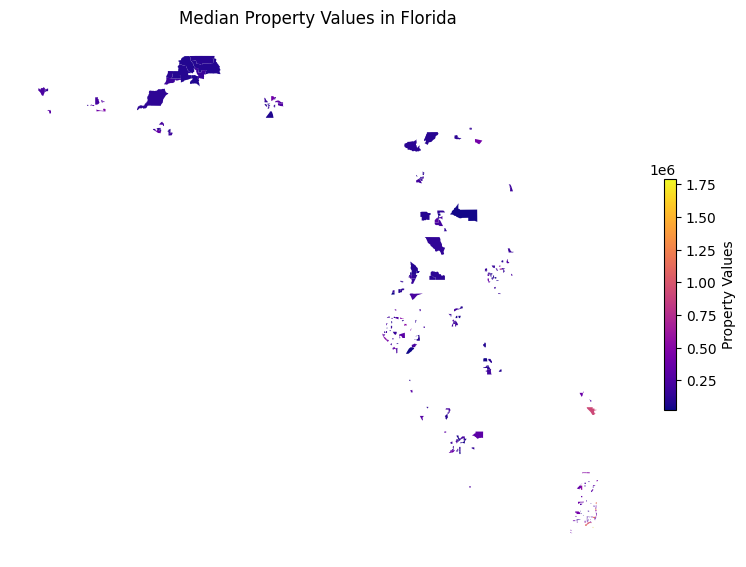

In [ ]:
# example 1.0
# visualizing property values of the whole Florida
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axis
df_shp.plot(column = 'property_value_median', cmap = 'plasma', legend=True,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()

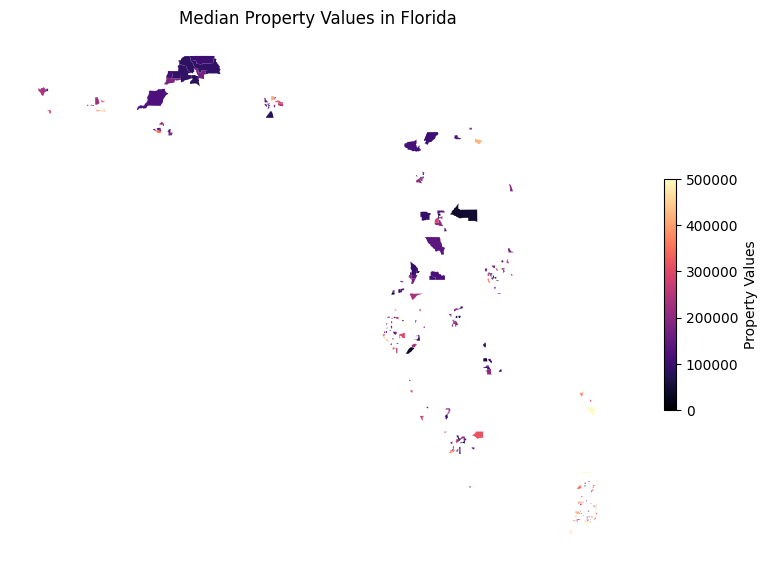

In [ ]:
# example 1.1. adjusting the legend vmin and vmax to highlight the areas with high property values.
# visualizing property values of the whole Florida.

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 0, vmax = 500000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()


## **Exercise** Visualizing household income in Florida

**How to zoom into a certain region?** Two approaches

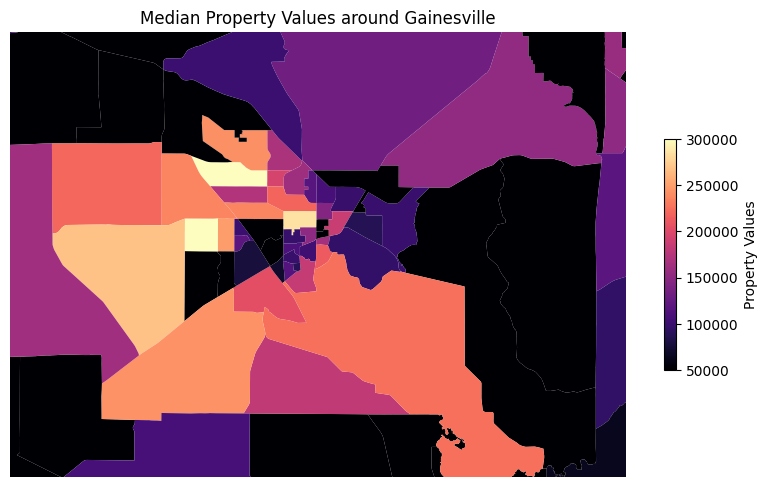

In [ ]:
# example 2.1. use the Florida shapefile but adjust the longitude and latitude to show a small area.
# x is the longitude.
# y is the latitude.

x_min = -82.649702
y_max = 29.827481
x_max = -82.025303
y_min = 29.428041

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 300000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values around Gainesville')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


In [ ]:
# example 2.2. Visualize only a subset.
# create a subset of the full data set.
Alachua_shp = df_shp.loc[df_shp.COUNTYFP == '001', :].reset_index()
print("The size of the Alachua shapefile is: ", Alachua_shp.shape)

# create a column for the coordinates
Alachua_shp['coords'] = Alachua_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
Alachua_shp['coords'] = [coords[0] for coords in Alachua_shp['coords']]

The size of the Alachua shapefile is:  (58, 102)


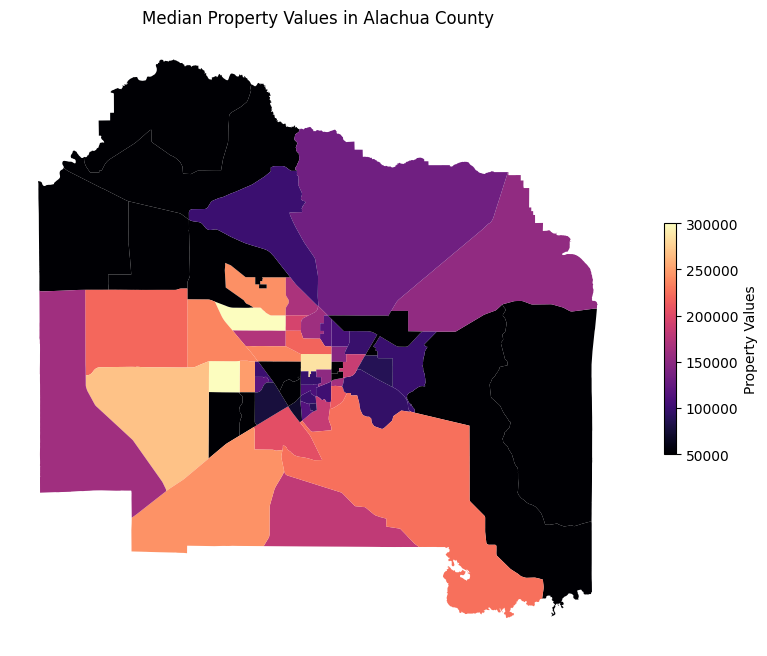

In [ ]:
# example 2.2. visualizing only the Alachua county.
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
Alachua_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 300000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Alachua County')

plt.tight_layout()
plt.show()

## Creating edges, check the adjacency matrix, and visualizing edges.

TypeError: annotate() missing 1 required positional argument: 'text'

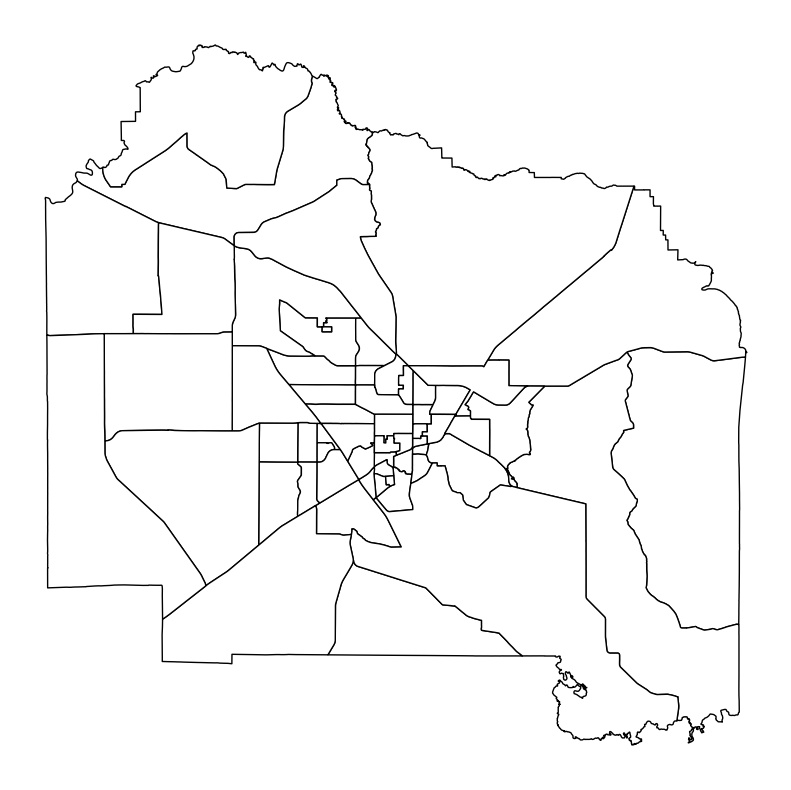

In [ ]:
# example 3.1. visualizing only the Alachua county.
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
Alachua_shp.plot(color = 'white', edgecolor = 'black', ax = ax)

for idx, row in Alachua_shp.iterrows():
  plt.annotate(s=idx, horizontalalignment='center', color='blue', xy=row['coords'])

ax.set_title('Alachua County')

plt.tight_layout()
plt.show()

In [ ]:
# Creating the adjacency matrix.
w_queen = weights.contiguity.Queen.from_dataframe(Alachua_shp)

In [ ]:
# Visualizing the adjacency matrix (20*20)
# the matrix view of the adjacency matrix.

w_queen_df = pd.DataFrame(w_queen.full()[0],
                          columns = w_queen.full()[1],
                          index = w_queen.full()[1])

# set up the printing option
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# printing only the first 20 columns & rows
w_queen_df.iloc[:20, :20]

In [ ]:
# Preparing for visualizing the edges by reprojecting Alachua shapefile
Alachua_shp = Alachua_shp.to_crs('3514')

# edit the coordinate column
Alachua_shp['coords'] = Alachua_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
Alachua_shp['coords'] = [coords[0] for coords in Alachua_shp['coords']]

In [ ]:
# visualizing the edges on a map
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off') # remove the axies

# 3514 is the projection index for the Alachua County
Alachua_shp.plot(color = 'white', edgecolor = 'black', ax = ax)
w_queen.plot(Alachua_shp, ax = ax,
             edge_kws=dict(color='r', linestyle=':', linewidth=1),
             node_kws=dict(marker='o', color='r'))

# edit the coordinates
# create a column for the coordinates

for idx, row in Alachua_shp.iterrows():
  plt.annotate(s=idx, horizontalalignment='center', color='blue', xy=row['coords'])

ax.set_title('Median Property Values in Alachua County')

plt.tight_layout()
plt.show()

## **Exercise.** Create a subset for Miami-Dade County. Visualize the property values, create the adjacency matrix, and visualize the edges.